In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [3]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [4]:
def my_probability(burst,bins,duration):
    prob=(1/(2*bins))/((burst-((burst-1)/(2*bins))))/duration
    return prob

# 1 bin

In [117]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts1(full_time,size,probability,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob=probability
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob:
                    burst[j,i:200+i]=np.nan
                    L[j,i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_num=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_num.append(fraction_val)
        fraction_val=0
        
    return burst_total,burst_num

## 50 stars

In [118]:
cluster_size50_1=50
steps=t*cadence
burst50_1=np.ones((cluster_size50_1,steps))
L50_1=np.zeros((cluster_size50_1,steps))
prob50_1=my_probability(100,1,100)/cadence

In [119]:
#1 bin
burst_total50_1=[]
burst_num50_1=[]

for i in range(run):
    burst50_1=np.ones((cluster_size50_1,steps))
    L50_1=np.zeros((cluster_size50_1,steps))
    values50_1=bursts1(t,50,prob50_1,L50_1,burst50_1)
    burst_total50_1.append(values50_1[0])
    burst_num50_1.append(values50_1[1])

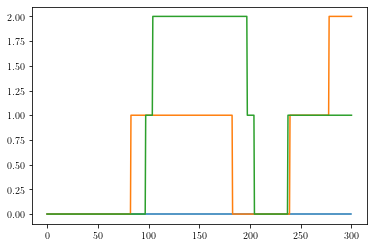

In [120]:
time=np.linspace(0,t,steps)
plt.plot(time,burst_num50_1[0])
plt.plot(time,burst_num50_1[1])
plt.plot(time,burst_num50_1[2])

In [121]:
#calculate the mean of each time step
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

In [122]:
cadence_num_bursts50_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_1.append(burst_num50_1[i][j])

## 100 stars 

In [123]:
cluster_size100_1=100
steps=t*cadence
burst100_1=np.ones((cluster_size100_1,steps))
L100_1=np.zeros((cluster_size100_1,steps))
prob100_1=my_probability(100,1,100)/cadence

In [124]:
#1 bin
burst_total100_1=[]
burst_num100_1=[]

for i in range(run):
    burst100_1=np.ones((cluster_size100_1,steps))
    L100_1=np.zeros((cluster_size100_1,steps))
    values100_1=bursts1(t,100,prob100_1,L100_1,burst100_1)
    burst_total100_1.append(values100_1[0])
    burst_num100_1.append(values100_1[1])

In [125]:
cadence_num_bursts100_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_1.append(burst_num100_1[i][j])

## 500 stars

In [126]:
cluster_size500_1=500
steps=t*cadence
burst500_1=np.ones((cluster_size500_1,steps))
L500_1=np.zeros((cluster_size500_1,steps))
prob500_1=my_probability(100,1,100)/cadence

In [127]:
#1 bin
burst_total500_1=[]
burst_num500_1=[]

for i in range(run):
    burst500_1=np.ones((cluster_size500_1,steps))
    L500_1=np.zeros((cluster_size500_1,steps))
    values500_1=bursts1(t,500,prob500_1,L500_1,burst500_1)
    burst_total500_1.append(values500_1[0])
    burst_num500_1.append(values500_1[1])

In [128]:
cadence_num_bursts500_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_1.append(burst_num500_1[i][j])

## 1000 stars

In [129]:
cluster_size1000_1=1000
steps=t*cadence
burst1000_1=np.ones((cluster_size1000_1,steps))
L1000_1=np.zeros((cluster_size1000_1,steps))
prob1000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total1000_1=[]
burst_num1000_1=[]

for i in range(run):
    burst1000_1=np.ones((cluster_size1000_1,steps))
    L1000_1=np.zeros((cluster_size1000_1,steps))
    values1000_1=bursts1(t,1000,prob1000_1,L1000_1,burst1000_1)
    burst_total1000_1.append(values1000_1[0])
    burst_num1000_1.append(values1000_1[1])
    
cadence_num_bursts1000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_1.append(burst_num1000_1[i][j])

## 2000 stars

In [130]:
cluster_size2000_1=2000
steps=t*cadence
burst2000_1=np.ones((cluster_size2000_1,steps))
L2000_1=np.zeros((cluster_size2000_1,steps))
prob2000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total2000_1=[]
burst_num2000_1=[]

for i in range(run):
    burst2000_1=np.ones((cluster_size2000_1,steps))
    L2000_1=np.zeros((cluster_size2000_1,steps))
    values2000_1=bursts1(t,2000,prob2000_1,L2000_1,burst2000_1)
    burst_total2000_1.append(values2000_1[0])
    burst_num2000_1.append(values2000_1[1])
    
cadence_num_bursts2000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_1.append(burst_num2000_1[i][j])

## 5000 stars

In [131]:
cluster_size5000_1=5000
steps=t*cadence
burst5000_1=np.ones((cluster_size5000_1,steps))
L5000_1=np.zeros((cluster_size5000_1,steps))
prob5000_1=my_probability(100,1,100)/cadence

#1 bin
burst_total5000_1=[]
burst_num5000_1=[]

for i in range(run):
    burst5000_1=np.ones((cluster_size5000_1,steps))
    L5000_1=np.zeros((cluster_size5000_1,steps))
    values5000_1=bursts1(t,5000,prob5000_1,L5000_1,burst5000_1)
    burst_total5000_1.append(values5000_1[0])
    burst_num5000_1.append(values5000_1[1])
    
cadence_num_bursts5000_1=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_1.append(burst_num5000_1[i][j])

[]

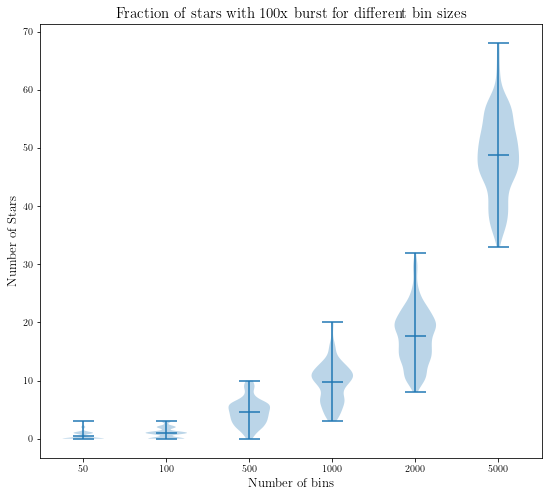

In [132]:
data_1bin_100=[cadence_num_bursts50_1,cadence_num_bursts100_1,cadence_num_bursts500_1,cadence_num_bursts1000_1,\
      cadence_num_bursts2000_1,cadence_num_bursts5000_1]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_1bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

# 2 bins

In [133]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts2(full_time,size,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob40:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total40=0
    total100=0
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
    
        
    return burst_total,burst_total40,burst_total100,burst_num40,burst_num100

## 50 stars

In [134]:
cluster_size50_2=50
steps=t*cadence
burst50_2=np.ones((cluster_size50_2,steps))
L50_2=np.zeros((cluster_size50_2,steps))
prob50_2_40=my_probability(40,2,40)/cadence
prob50_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total50_2=[]
burst_total50_2_40=[]
burst_num50_2_40=[]
burst_total50_2_100=[]
burst_num50_2_100=[]

for i in range(run):
    burst50_2=np.ones((cluster_size50_2,steps))
    L50_2=np.zeros((cluster_size50_2,steps))
    values50_2=bursts2(t,50,prob50_2_40,prob50_2_100,L50_2,burst50_2)
    burst_total50_2.append(values50_2[0])
    burst_total50_2_40.append(values50_2[1])
    burst_total50_2_100.append(values50_2[2])
    burst_num50_2_40.append(values50_2[3])
    burst_num50_2_100.append(values50_2[4])

In [135]:
cadence_num_bursts50_2_40=[]
cadence_num_bursts50_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_2_40.append(burst_num50_2_40[i][j])
        cadence_num_bursts50_2_100.append(burst_num50_2_100[i][j])

## 100 stars

In [136]:
cluster_size100_2=100
steps=t*cadence
burst100_2=np.ones((cluster_size100_2,steps))
L100_2=np.zeros((cluster_size100_2,steps))
prob100_2_40=my_probability(40,2,40)/cadence
prob100_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total100_2=[]
burst_total100_2_40=[]
burst_num100_2_40=[]
burst_total100_2_100=[]
burst_num100_2_100=[]

for i in range(run):
    burst100_2=np.ones((cluster_size100_2,steps))
    L100_2=np.zeros((cluster_size100_2,steps))
    values100_2=bursts2(t,100,prob100_2_40,prob100_2_100,L100_2,burst100_2)
    burst_total100_2.append(values100_2[0])
    burst_total100_2_40.append(values100_2[1])
    burst_total100_2_100.append(values100_2[2])
    burst_num100_2_40.append(values100_2[3])
    burst_num100_2_100.append(values100_2[4])

In [137]:
cadence_num_bursts100_2_40=[]
cadence_num_bursts100_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_2_40.append(burst_num100_2_40[i][j])
        cadence_num_bursts100_2_100.append(burst_num100_2_100[i][j])

## 500 stars

In [138]:
cluster_size500_2=500
steps=t*cadence
burst500_2=np.ones((cluster_size500_2,steps))
L500_2=np.zeros((cluster_size500_2,steps))
prob500_2_40=my_probability(40,2,40)/cadence
prob500_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total500_2=[]
burst_total500_2_40=[]
burst_num500_2_40=[]
burst_total500_2_100=[]
burst_num500_2_100=[]

for i in range(run):
    burst500_2=np.ones((cluster_size500_2,steps))
    L500_2=np.zeros((cluster_size500_2,steps))
    values500_2=bursts2(t,500,prob500_2_40,prob500_2_100,L500_2,burst500_2)
    burst_total500_2.append(values500_2[0])
    burst_total500_2_40.append(values500_2[1])
    burst_total500_2_100.append(values500_2[2])
    burst_num500_2_40.append(values500_2[3])
    burst_num500_2_100.append(values500_2[4])

In [139]:
cadence_num_bursts500_2_40=[]
cadence_num_bursts500_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_2_40.append(burst_num500_2_40[i][j])
        cadence_num_bursts500_2_100.append(burst_num500_2_100[i][j])

## 1000 stars

In [140]:
cluster_size1000_2=1000
steps=t*cadence
burst1000_2=np.ones((cluster_size1000_2,steps))
L1000_2=np.zeros((cluster_size1000_2,steps))
prob1000_2_40=my_probability(40,2,40)/cadence
prob1000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total1000_2=[]
burst_total1000_2_40=[]
burst_num1000_2_40=[]
burst_total1000_2_100=[]
burst_num1000_2_100=[]

for i in range(run):
    burst1000_2=np.ones((cluster_size1000_2,steps))
    L1000_2=np.zeros((cluster_size1000_2,steps))
    values1000_2=bursts2(t,1000,prob1000_2_40,prob1000_2_100,L1000_2,burst1000_2)
    burst_total1000_2.append(values1000_2[0])
    burst_total1000_2_40.append(values1000_2[1])
    burst_total1000_2_100.append(values1000_2[2])
    burst_num1000_2_40.append(values1000_2[3])
    burst_num1000_2_100.append(values1000_2[4])

In [141]:
cadence_num_bursts1000_2_40=[]
cadence_num_bursts1000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_2_40.append(burst_num1000_2_40[i][j])
        cadence_num_bursts1000_2_100.append(burst_num1000_2_100[i][j])

## 2000 stars

In [142]:
cluster_size2000_2=2000
steps=t*cadence
burst2000_2=np.ones((cluster_size2000_2,steps))
L2000_2=np.zeros((cluster_size2000_2,steps))
prob2000_2_40=my_probability(40,2,40)/cadence
prob2000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total2000_2=[]
burst_total2000_2_40=[]
burst_num2000_2_40=[]
burst_total2000_2_100=[]
burst_num2000_2_100=[]

for i in range(run):
    burst2000_2=np.ones((cluster_size2000_2,steps))
    L2000_2=np.zeros((cluster_size2000_2,steps))
    values2000_2=bursts2(t,2000,prob2000_2_40,prob2000_2_100,L2000_2,burst2000_2)
    burst_total2000_2.append(values2000_2[0])
    burst_total2000_2_40.append(values2000_2[1])
    burst_total2000_2_100.append(values2000_2[2])
    burst_num2000_2_40.append(values2000_2[3])
    burst_num2000_2_100.append(values2000_2[4])

In [143]:
cadence_num_bursts2000_2_40=[]
cadence_num_bursts2000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_2_40.append(burst_num2000_2_40[i][j])
        cadence_num_bursts2000_2_100.append(burst_num2000_2_100[i][j])

## 5000 stars

In [279]:
cluster_size5000_2=5000
steps=t*cadence
burst5000_2=np.ones((cluster_size5000_2,steps))
L5000_2=np.zeros((cluster_size5000_2,steps))
prob5000_2_40=my_probability(40,2,40)/cadence
prob5000_2_100=my_probability(100,2,100)/cadence

#1 bin
burst_total5000_2=[]
burst_total5000_2_40=[]
burst_num5000_2_40=[]
burst_total5000_2_100=[]
burst_num5000_2_100=[]

for i in range(run):
    print(i)
    burst5000_2=np.ones((cluster_size5000_2,steps))
    L5000_2=np.zeros((cluster_size5000_2,steps))
    values5000_2=bursts2(t,5000,prob5000_2_40,prob5000_2_100,L5000_2,burst5000_2)
    burst_total5000_2.append(values5000_2[0])
    burst_total5000_2_40.append(values5000_2[1])
    burst_total5000_2_100.append(values5000_2[2])
    burst_num5000_2_40.append(values5000_2[3])
    burst_num5000_2_100.append(values5000_2[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [280]:
cadence_num_bursts5000_2_40=[]
cadence_num_bursts5000_2_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_2_40.append(burst_num5000_2_40[i][j])
        cadence_num_bursts5000_2_100.append(burst_num5000_2_100[i][j])

[]

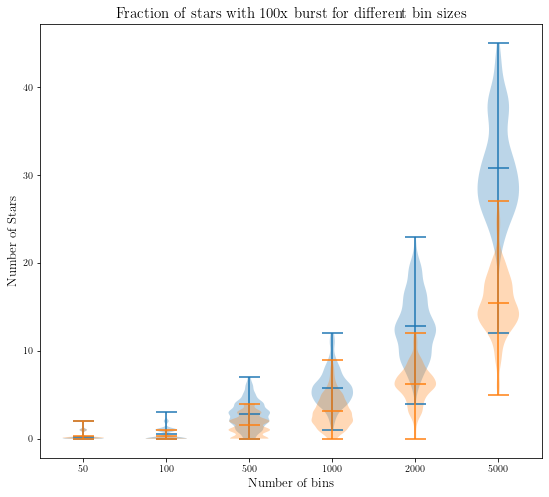

In [281]:
data_2bin_40=[cadence_num_bursts50_2_40,cadence_num_bursts100_2_40,cadence_num_bursts500_2_40,\
              cadence_num_bursts1000_2_40,cadence_num_bursts2000_2_40,cadence_num_bursts5000_2_40]
data_2bin_100=[cadence_num_bursts50_2_100,cadence_num_bursts100_2_100,cadence_num_bursts500_2_100,\
              cadence_num_bursts1000_2_100,cadence_num_bursts2000_2_100,cadence_num_bursts5000_2_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_2bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_2bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

# 3 bins

In [147]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts3(full_time,size,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob16:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total16=0
    total40=0
    total100=0
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total16,burst_total40,burst_total100,burst_num16,burst_num40,burst_num100

## 50 stars

In [148]:
cluster_size50_3=50
steps=t*cadence
burst50_3=np.ones((cluster_size50_3,steps))
L50_3=np.zeros((cluster_size50_3,steps))
prob50_3_16=my_probability(16,3,16)/cadence
prob50_3_40=my_probability(40,2,40)/cadence
prob50_3_100=my_probability(100,2,100)/cadence

burst_total50_3=[]
burst_total50_3_16=[]
burst_num50_3_16=[]
burst_total50_3_40=[]
burst_num50_3_40=[]
burst_total50_3_100=[]
burst_num50_3_100=[]

for i in range(run):
    burst50_3=np.ones((cluster_size50_3,steps))
    L50_3=np.zeros((cluster_size50_3,steps))
    values50_3=bursts3(t,50,prob50_3_16,prob50_3_40,prob50_3_100,L50_3,burst50_3)
    burst_total50_3.append(values50_3[0])
    burst_total50_3_16.append(values50_3[1])
    burst_total50_3_40.append(values50_3[2])
    burst_total50_3_100.append(values50_3[3])
    burst_num50_3_16.append(values50_3[4])
    burst_num50_3_40.append(values50_3[5])
    burst_num50_3_100.append(values50_3[6])

In [149]:
cadence_num_bursts50_3_16=[]
cadence_num_bursts50_3_40=[]
cadence_num_bursts50_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_3_16.append(burst_num50_3_16[i][j])
        cadence_num_bursts50_3_40.append(burst_num50_3_40[i][j])
        cadence_num_bursts50_3_100.append(burst_num50_3_100[i][j])

## 100 stars

In [150]:
cluster_size100_3=100
steps=t*cadence
burst100_3=np.ones((cluster_size100_3,steps))
L100_3=np.zeros((cluster_size100_3,steps))
prob100_3_16=my_probability(16,3,16)/cadence
prob100_3_40=my_probability(40,2,40)/cadence
prob100_3_100=my_probability(100,2,100)/cadence

burst_total100_3=[]
burst_total100_3_16=[]
burst_num100_3_16=[]
burst_total100_3_40=[]
burst_num100_3_40=[]
burst_total100_3_100=[]
burst_num100_3_100=[]

for i in range(run):
    burst100_3=np.ones((cluster_size100_3,steps))
    L100_3=np.zeros((cluster_size100_3,steps))
    values100_3=bursts3(t,100,prob100_3_16,prob100_3_40,prob100_3_100,L100_3,burst100_3)
    burst_total100_3.append(values100_3[0])
    burst_total100_3_16.append(values100_3[1])
    burst_total100_3_40.append(values100_3[2])
    burst_total100_3_100.append(values100_3[3])
    burst_num100_3_16.append(values100_3[4])
    burst_num100_3_40.append(values100_3[5])
    burst_num100_3_100.append(values100_3[6])

In [151]:
cadence_num_bursts100_3_16=[]
cadence_num_bursts100_3_40=[]
cadence_num_bursts100_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_3_16.append(burst_num100_3_16[i][j])
        cadence_num_bursts100_3_40.append(burst_num100_3_40[i][j])
        cadence_num_bursts100_3_100.append(burst_num100_3_100[i][j])

## 500 stars

In [152]:
cluster_size500_3=500
steps=t*cadence
burst500_3=np.ones((cluster_size500_3,steps))
L500_3=np.zeros((cluster_size500_3,steps))
prob500_3_16=my_probability(16,3,16)/cadence
prob500_3_40=my_probability(40,3,40)/cadence
prob500_3_100=my_probability(100,3,100)/cadence

burst_total500_3=[]
burst_total500_3_16=[]
burst_num500_3_16=[]
burst_total500_3_40=[]
burst_num500_3_40=[]
burst_total500_3_100=[]
burst_num500_3_100=[]

for i in range(run):
    burst500_3=np.ones((cluster_size500_3,steps))
    L500_3=np.zeros((cluster_size500_3,steps))
    values500_3=bursts3(t,500,prob500_3_16,prob500_3_40,prob500_3_100,L500_3,burst500_3)
    burst_total500_3.append(values500_3[0])
    burst_total500_3_16.append(values500_3[1])
    burst_total500_3_40.append(values500_3[2])
    burst_total500_3_100.append(values500_3[3])
    burst_num500_3_16.append(values500_3[4])
    burst_num500_3_40.append(values500_3[5])
    burst_num500_3_100.append(values500_3[6])

In [153]:
cadence_num_bursts500_3_16=[]
cadence_num_bursts500_3_40=[]
cadence_num_bursts500_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_3_16.append(burst_num500_3_16[i][j])
        cadence_num_bursts500_3_40.append(burst_num500_3_40[i][j])
        cadence_num_bursts500_3_100.append(burst_num500_3_100[i][j])

## 1000 stars

In [154]:
cluster_size1000_3=1000
steps=t*cadence
burst1000_3=np.ones((cluster_size1000_3,steps))
L1000_3=np.zeros((cluster_size1000_3,steps))
prob1000_3_16=my_probability(16,3,16)/cadence
prob1000_3_40=my_probability(40,3,40)/cadence
prob1000_3_100=my_probability(100,3,100)/cadence

burst_total1000_3=[]
burst_total1000_3_16=[]
burst_num1000_3_16=[]
burst_total1000_3_40=[]
burst_num1000_3_40=[]
burst_total1000_3_100=[]
burst_num1000_3_100=[]

for i in range(run):
    burst1000_3=np.ones((cluster_size1000_3,steps))
    L1000_3=np.zeros((cluster_size1000_3,steps))
    values1000_3=bursts3(t,1000,prob1000_3_16,prob1000_3_40,prob1000_3_100,L1000_3,burst1000_3)
    burst_total1000_3.append(values1000_3[0])
    burst_total1000_3_16.append(values1000_3[1])
    burst_total1000_3_40.append(values1000_3[2])
    burst_total1000_3_100.append(values1000_3[3])
    burst_num1000_3_16.append(values1000_3[4])
    burst_num1000_3_40.append(values1000_3[5])
    burst_num1000_3_100.append(values1000_3[6])

In [155]:
cadence_num_bursts1000_3_16=[]
cadence_num_bursts1000_3_40=[]
cadence_num_bursts1000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_3_16.append(burst_num1000_3_16[i][j])
        cadence_num_bursts1000_3_40.append(burst_num1000_3_40[i][j])
        cadence_num_bursts1000_3_100.append(burst_num1000_3_100[i][j])

## 2000 stars

In [156]:
cluster_size2000_3=2000
steps=t*cadence
burst2000_3=np.ones((cluster_size2000_3,steps))
L2000_3=np.zeros((cluster_size2000_3,steps))
prob2000_3_16=my_probability(16,3,16)/cadence
prob2000_3_40=my_probability(40,3,40)/cadence
prob2000_3_100=my_probability(100,3,100)/cadence

burst_total2000_3=[]
burst_total2000_3_16=[]
burst_num2000_3_16=[]
burst_total2000_3_40=[]
burst_num2000_3_40=[]
burst_total2000_3_100=[]
burst_num2000_3_100=[]

for i in range(run):
    burst2000_3=np.ones((cluster_size2000_3,steps))
    L2000_3=np.zeros((cluster_size2000_3,steps))
    values2000_3=bursts3(t,2000,prob2000_3_16,prob2000_3_40,prob2000_3_100,L2000_3,burst2000_3)
    burst_total2000_3.append(values2000_3[0])
    burst_total2000_3_16.append(values2000_3[1])
    burst_total2000_3_40.append(values2000_3[2])
    burst_total2000_3_100.append(values2000_3[3])
    burst_num2000_3_16.append(values2000_3[4])
    burst_num2000_3_40.append(values2000_3[5])
    burst_num2000_3_100.append(values2000_3[6])

In [157]:
cadence_num_bursts2000_3_16=[]
cadence_num_bursts2000_3_40=[]
cadence_num_bursts2000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_3_16.append(burst_num2000_3_16[i][j])
        cadence_num_bursts2000_3_40.append(burst_num2000_3_40[i][j])
        cadence_num_bursts2000_3_100.append(burst_num2000_3_100[i][j])

## 5000 stars

In [158]:
cluster_size5000_3=5000
steps=t*cadence
burst5000_3=np.ones((cluster_size5000_3,steps))
L5000_3=np.zeros((cluster_size5000_3,steps))
prob5000_3_16=my_probability(16,3,16)/cadence
prob5000_3_40=my_probability(40,3,40)/cadence
prob5000_3_100=my_probability(100,3,100)/cadence

burst_total5000_3=[]
burst_total5000_3_16=[]
burst_num5000_3_16=[]
burst_total5000_3_40=[]
burst_num5000_3_40=[]
burst_total5000_3_100=[]
burst_num5000_3_100=[]

for i in range(run):
    print(i)
    burst5000_3=np.ones((cluster_size5000_3,steps))
    L5000_3=np.zeros((cluster_size5000_3,steps))
    values5000_3=bursts3(t,5000,prob5000_3_16,prob5000_3_40,prob5000_3_100,L5000_3,burst5000_3)
    burst_total5000_3.append(values5000_3[0])
    burst_total5000_3_16.append(values5000_3[1])
    burst_total5000_3_40.append(values5000_3[2])
    burst_total5000_3_100.append(values5000_3[3])
    burst_num5000_3_16.append(values5000_3[4])
    burst_num5000_3_40.append(values5000_3[5])
    burst_num5000_3_100.append(values5000_3[6])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [159]:
cadence_num_bursts5000_3_16=[]
cadence_num_bursts5000_3_40=[]
cadence_num_bursts5000_3_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_3_16.append(burst_num5000_3_16[i][j])
        cadence_num_bursts5000_3_40.append(burst_num5000_3_40[i][j])
        cadence_num_bursts5000_3_100.append(burst_num5000_3_100[i][j])

[]

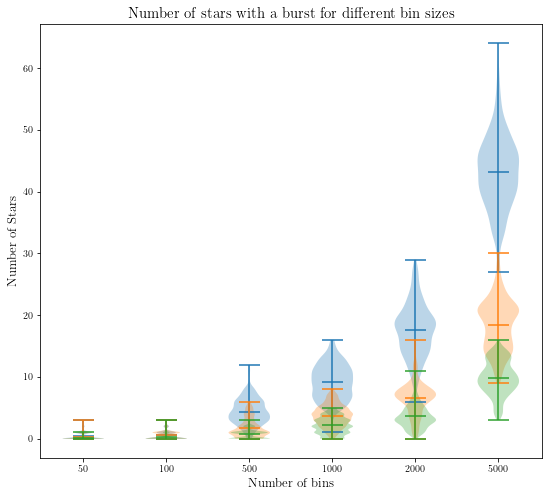

In [160]:
data_3bin_16=[cadence_num_bursts50_3_16,cadence_num_bursts100_3_16,cadence_num_bursts500_3_16,\
              cadence_num_bursts1000_3_16,cadence_num_bursts2000_3_16,cadence_num_bursts5000_3_16]
data_3bin_40=[cadence_num_bursts50_3_40,cadence_num_bursts100_3_40,cadence_num_bursts500_3_40,\
              cadence_num_bursts1000_3_40,cadence_num_bursts2000_3_40,cadence_num_bursts5000_3_40]
data_3bin_100=[cadence_num_bursts50_3_100,cadence_num_bursts100_3_100,cadence_num_bursts500_3_100,\
              cadence_num_bursts1000_3_100,cadence_num_bursts2000_3_100,cadence_num_bursts5000_3_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_3bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_3bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_3bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of stars with a burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 4 bins

In [161]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts4(full_time,size,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob6:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num6=[]
    frac_val6=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_num6.append(frac_val6)
        frac_val6=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total6,burst_total16,burst_total40,burst_total100,burst_num6,burst_num16,\
burst_num40,burst_num100

## 50 stars

In [162]:
cluster_size50_4=50
steps=t*cadence
burst50_4=np.ones((cluster_size50_4,steps))
L50_4=np.zeros((cluster_size50_4,steps))
prob50_4_6=my_probability(6.3,4,6.3)
prob50_4_16=my_probability(16,4,16)/cadence
prob50_4_40=my_probability(40,4,40)/cadence
prob50_4_100=my_probability(100,4,100)/cadence

burst_total50_4=[]
burst_total50_4_6=[]
burst_num50_4_6=[]
burst_total50_4_16=[]
burst_num50_4_16=[]
burst_total50_4_40=[]
burst_num50_4_40=[]
burst_total50_4_100=[]
burst_num50_4_100=[]

for i in range(run):
    burst50_4=np.ones((cluster_size50_4,steps))
    L50_4=np.zeros((cluster_size50_4,steps))
    values50_4=bursts4(t,50,prob50_4_6,prob50_4_16,prob50_4_40,prob50_4_100,L50_4,burst50_4)
    burst_total50_4.append(values50_4[0])
    burst_total50_4_6.append(values50_4[1])
    burst_total50_4_16.append(values50_4[2])
    burst_total50_4_40.append(values50_4[3])
    burst_total50_4_100.append(values50_4[4])
    burst_num50_4_6.append(values50_4[5])
    burst_num50_4_16.append(values50_4[6])
    burst_num50_4_40.append(values50_4[7])
    burst_num50_4_100.append(values50_4[8])

In [163]:
cadence_num_bursts50_4_6=[]
cadence_num_bursts50_4_16=[]
cadence_num_bursts50_4_40=[]
cadence_num_bursts50_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_4_6.append(burst_num50_4_6[i][j])        
        cadence_num_bursts50_4_16.append(burst_num50_4_16[i][j])
        cadence_num_bursts50_4_40.append(burst_num50_4_40[i][j])
        cadence_num_bursts50_4_100.append(burst_num50_4_100[i][j])

## 100 stars

In [164]:
cluster_size100_4=100
steps=t*cadence
burst100_4=np.ones((cluster_size100_4,steps))
L100_4=np.zeros((cluster_size100_4,steps))
prob100_4_6=my_probability(6.3,4,6.3)
prob100_4_16=my_probability(16,4,16)/cadence
prob100_4_40=my_probability(40,4,40)/cadence
prob100_4_100=my_probability(100,4,100)/cadence

burst_total100_4=[]
burst_total100_4_6=[]
burst_num100_4_6=[]
burst_total100_4_16=[]
burst_num100_4_16=[]
burst_total100_4_40=[]
burst_num100_4_40=[]
burst_total100_4_100=[]
burst_num100_4_100=[]

for i in range(run):
    burst100_4=np.ones((cluster_size100_4,steps))
    L100_4=np.zeros((cluster_size100_4,steps))
    values100_4=bursts4(t,100,prob100_4_6,prob100_4_16,prob100_4_40,prob100_4_100,L100_4,burst100_4)
    burst_total100_4.append(values100_4[0])
    burst_total100_4_6.append(values100_4[1])
    burst_total100_4_16.append(values100_4[2])
    burst_total100_4_40.append(values100_4[3])
    burst_total100_4_100.append(values100_4[4])
    burst_num100_4_6.append(values100_4[5])
    burst_num100_4_16.append(values100_4[6])
    burst_num100_4_40.append(values100_4[7])
    burst_num100_4_100.append(values100_4[8])

In [165]:
cadence_num_bursts100_4_6=[]
cadence_num_bursts100_4_16=[]
cadence_num_bursts100_4_40=[]
cadence_num_bursts100_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_4_6.append(burst_num100_4_6[i][j])        
        cadence_num_bursts100_4_16.append(burst_num100_4_16[i][j])
        cadence_num_bursts100_4_40.append(burst_num100_4_40[i][j])
        cadence_num_bursts100_4_100.append(burst_num100_4_100[i][j])

## 500 stars

In [166]:
cluster_size500_4=500
steps=t*cadence
burst500_4=np.ones((cluster_size500_4,steps))
L500_4=np.zeros((cluster_size500_4,steps))
prob500_4_6=my_probability(6.3,4,6.3)
prob500_4_16=my_probability(16,4,16)/cadence
prob500_4_40=my_probability(40,4,40)/cadence
prob500_4_100=my_probability(100,4,100)/cadence

burst_total500_4=[]
burst_total500_4_6=[]
burst_num500_4_6=[]
burst_total500_4_16=[]
burst_num500_4_16=[]
burst_total500_4_40=[]
burst_num500_4_40=[]
burst_total500_4_100=[]
burst_num500_4_100=[]

for i in range(run):
    burst500_4=np.ones((cluster_size500_4,steps))
    L500_4=np.zeros((cluster_size500_4,steps))
    values500_4=bursts4(t,500,prob500_4_6,prob500_4_16,prob500_4_40,prob500_4_100,L500_4,burst500_4)
    burst_total500_4.append(values500_4[0])
    burst_total500_4_6.append(values500_4[1])
    burst_total500_4_16.append(values500_4[2])
    burst_total500_4_40.append(values500_4[3])
    burst_total500_4_100.append(values500_4[4])
    burst_num500_4_6.append(values500_4[5])
    burst_num500_4_16.append(values500_4[6])
    burst_num500_4_40.append(values500_4[7])
    burst_num500_4_100.append(values500_4[8])

In [167]:
cadence_num_bursts500_4_6=[]
cadence_num_bursts500_4_16=[]
cadence_num_bursts500_4_40=[]
cadence_num_bursts500_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_4_6.append(burst_num500_4_6[i][j])        
        cadence_num_bursts500_4_16.append(burst_num500_4_16[i][j])
        cadence_num_bursts500_4_40.append(burst_num500_4_40[i][j])
        cadence_num_bursts500_4_100.append(burst_num500_4_100[i][j])

## 1000 stars

In [168]:
cluster_size1000_4=1000
steps=t*cadence
burst1000_4=np.ones((cluster_size1000_4,steps))
L1000_4=np.zeros((cluster_size1000_4,steps))
prob1000_4_6=my_probability(6.3,4,6.3)
prob1000_4_16=my_probability(16,4,16)/cadence
prob1000_4_40=my_probability(40,4,40)/cadence
prob1000_4_100=my_probability(100,4,100)/cadence

burst_total1000_4=[]
burst_total1000_4_6=[]
burst_num1000_4_6=[]
burst_total1000_4_16=[]
burst_num1000_4_16=[]
burst_total1000_4_40=[]
burst_num1000_4_40=[]
burst_total1000_4_100=[]
burst_num1000_4_100=[]

for i in range(run):
    burst1000_4=np.ones((cluster_size1000_4,steps))
    L1000_4=np.zeros((cluster_size1000_4,steps))
    values1000_4=bursts4(t,1000,prob1000_4_6,prob1000_4_16,prob1000_4_40,prob1000_4_100,L1000_4,burst1000_4)
    burst_total1000_4.append(values1000_4[0])
    burst_total1000_4_6.append(values1000_4[1])
    burst_total1000_4_16.append(values1000_4[2])
    burst_total1000_4_40.append(values1000_4[3])
    burst_total1000_4_100.append(values1000_4[4])
    burst_num1000_4_6.append(values1000_4[5])
    burst_num1000_4_16.append(values1000_4[6])
    burst_num1000_4_40.append(values1000_4[7])
    burst_num1000_4_100.append(values1000_4[8])

In [169]:
cadence_num_bursts1000_4_6=[]
cadence_num_bursts1000_4_16=[]
cadence_num_bursts1000_4_40=[]
cadence_num_bursts1000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_4_6.append(burst_num1000_4_6[i][j])        
        cadence_num_bursts1000_4_16.append(burst_num1000_4_16[i][j])
        cadence_num_bursts1000_4_40.append(burst_num1000_4_40[i][j])
        cadence_num_bursts1000_4_100.append(burst_num1000_4_100[i][j])

## 2000 stars

In [170]:
cluster_size2000_4=2000
steps=t*cadence
burst2000_4=np.ones((cluster_size2000_4,steps))
L2000_4=np.zeros((cluster_size2000_4,steps))
prob2000_4_6=my_probability(6.3,4,6.3)
prob2000_4_16=my_probability(16,4,16)/cadence
prob2000_4_40=my_probability(40,4,40)/cadence
prob2000_4_100=my_probability(100,4,100)/cadence

burst_total2000_4=[]
burst_total2000_4_6=[]
burst_num2000_4_6=[]
burst_total2000_4_16=[]
burst_num2000_4_16=[]
burst_total2000_4_40=[]
burst_num2000_4_40=[]
burst_total2000_4_100=[]
burst_num2000_4_100=[]

for i in range(run):
    burst2000_4=np.ones((cluster_size2000_4,steps))
    L2000_4=np.zeros((cluster_size2000_4,steps))
    values2000_4=bursts4(t,2000,prob2000_4_6,prob2000_4_16,prob2000_4_40,prob2000_4_100,L2000_4,burst2000_4)
    burst_total2000_4.append(values2000_4[0])
    burst_total2000_4_6.append(values2000_4[1])
    burst_total2000_4_16.append(values2000_4[2])
    burst_total2000_4_40.append(values2000_4[3])
    burst_total2000_4_100.append(values2000_4[4])
    burst_num2000_4_6.append(values2000_4[5])
    burst_num2000_4_16.append(values2000_4[6])
    burst_num2000_4_40.append(values2000_4[7])
    burst_num2000_4_100.append(values2000_4[8])

In [171]:
cadence_num_bursts2000_4_6=[]
cadence_num_bursts2000_4_16=[]
cadence_num_bursts2000_4_40=[]
cadence_num_bursts2000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_4_6.append(burst_num2000_4_6[i][j])        
        cadence_num_bursts2000_4_16.append(burst_num2000_4_16[i][j])
        cadence_num_bursts2000_4_40.append(burst_num2000_4_40[i][j])
        cadence_num_bursts2000_4_100.append(burst_num2000_4_100[i][j])

## 5000 stars

In [172]:
cluster_size5000_4=5000
steps=t*cadence
burst5000_4=np.ones((cluster_size5000_4,steps))
L5000_4=np.zeros((cluster_size5000_4,steps))
prob5000_4_6=my_probability(6.3,4,6.3)
prob5000_4_16=my_probability(16,4,16)/cadence
prob5000_4_40=my_probability(40,4,40)/cadence
prob5000_4_100=my_probability(100,4,100)/cadence

burst_total5000_4=[]
burst_total5000_4_6=[]
burst_num5000_4_6=[]
burst_total5000_4_16=[]
burst_num5000_4_16=[]
burst_total5000_4_40=[]
burst_num5000_4_40=[]
burst_total5000_4_100=[]
burst_num5000_4_100=[]

for i in range(run):
    #print(i)
    burst5000_4=np.ones((cluster_size5000_4,steps))
    L5000_4=np.zeros((cluster_size5000_4,steps))
    values5000_4=bursts4(t,5000,prob5000_4_6,prob5000_4_16,prob5000_4_40,prob5000_4_100,L5000_4,burst5000_4)
    burst_total5000_4.append(values5000_4[0])
    burst_total5000_4_6.append(values5000_4[1])
    burst_total5000_4_16.append(values5000_4[2])
    burst_total5000_4_40.append(values5000_4[3])
    burst_total5000_4_100.append(values5000_4[4])
    burst_num5000_4_6.append(values5000_4[5])
    burst_num5000_4_16.append(values5000_4[6])
    burst_num5000_4_40.append(values5000_4[7])
    burst_num5000_4_100.append(values5000_4[8])

In [173]:
cadence_num_bursts5000_4_6=[]
cadence_num_bursts5000_4_16=[]
cadence_num_bursts5000_4_40=[]
cadence_num_bursts5000_4_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_4_6.append(burst_num5000_4_6[i][j])        
        cadence_num_bursts5000_4_16.append(burst_num5000_4_16[i][j])
        cadence_num_bursts5000_4_40.append(burst_num5000_4_40[i][j])
        cadence_num_bursts5000_4_100.append(burst_num5000_4_100[i][j])

[]

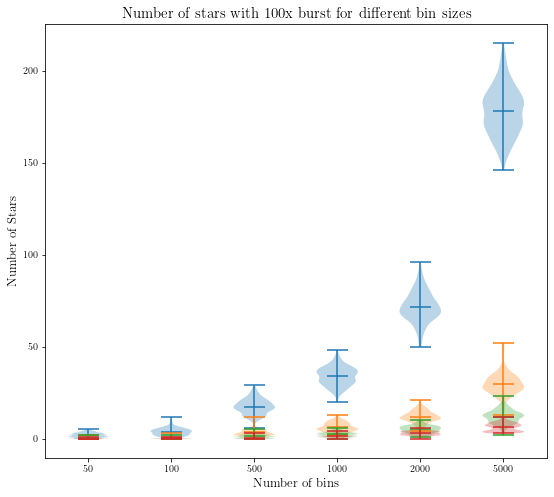

In [174]:
data_4bin_6=[cadence_num_bursts50_4_6,cadence_num_bursts100_4_6,cadence_num_bursts500_4_6,\
              cadence_num_bursts1000_4_6,cadence_num_bursts2000_4_6,cadence_num_bursts5000_4_6]
data_4bin_16=[cadence_num_bursts50_4_16,cadence_num_bursts100_4_16,cadence_num_bursts500_4_16,\
              cadence_num_bursts1000_4_16,cadence_num_bursts2000_4_16,cadence_num_bursts5000_4_16]
data_4bin_40=[cadence_num_bursts50_4_40,cadence_num_bursts100_4_40,cadence_num_bursts500_4_40,\
              cadence_num_bursts1000_4_40,cadence_num_bursts2000_4_40,cadence_num_bursts5000_4_40]
data_4bin_100=[cadence_num_bursts50_4_100,cadence_num_bursts100_4_100,cadence_num_bursts500_4_100,\
              cadence_num_bursts1000_4_100,cadence_num_bursts2000_4_100,cadence_num_bursts5000_4_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_4bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_4bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 5 bins

In [177]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts5(full_time,size,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob3=prob3
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob3:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob3 and prob>burst_prob6:
                    burst[j,i:7+i]=np.nan
                    L[j,i:7+i]=cluster_mag[j]-1.25
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
                total3+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num3=[]
    frac_val3=0
    burst_num6=[]
    frac_val6=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
                frac_val3+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num6.append(frac_val6)
        frac_val6=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_num3,burst_num6,\
burst_num16,burst_num40,burst_num100

## 50 stars

In [178]:
cluster_size50_5=50
steps=t*cadence
burst50_5=np.ones((cluster_size50_5,steps))
L50_5=np.zeros((cluster_size50_5,steps))
prob50_5_3=my_probability(3.2,5,3.2)
prob50_5_6=my_probability(6.3,5,6.3)
prob50_5_16=my_probability(16,5,16)/cadence
prob50_5_40=my_probability(40,5,40)/cadence
prob50_5_100=my_probability(100,5,100)/cadence

burst_total50_5=[]
burst_total50_5_3=[]
burst_num50_5_3=[]
burst_total50_5_6=[]
burst_num50_5_6=[]
burst_total50_5_16=[]
burst_num50_5_16=[]
burst_total50_5_40=[]
burst_num50_5_40=[]
burst_total50_5_100=[]
burst_num50_5_100=[]

for i in range(run):
    burst50_5=np.ones((cluster_size50_5,steps))
    L50_5=np.zeros((cluster_size50_5,steps))
    values50_5=bursts5(t,50,prob50_5_3,prob50_5_6,prob50_5_16,prob50_5_40,prob50_5_100,L50_5,burst50_5)
    burst_total50_5.append(values50_5[0])
    burst_total50_5_3.append(values50_5[1])
    burst_total50_5_6.append(values50_5[2])
    burst_total50_5_16.append(values50_5[3])
    burst_total50_5_40.append(values50_5[4])
    burst_total50_5_100.append(values50_5[5])
    burst_num50_5_3.append(values50_5[6])
    burst_num50_5_6.append(values50_5[7])
    burst_num50_5_16.append(values50_5[8])
    burst_num50_5_40.append(values50_5[9])
    burst_num50_5_100.append(values50_5[10])

In [179]:
cadence_num_bursts50_5_3=[]
cadence_num_bursts50_5_6=[]
cadence_num_bursts50_5_16=[]
cadence_num_bursts50_5_40=[]
cadence_num_bursts50_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_5_3.append(burst_num50_5_3[i][j])
        cadence_num_bursts50_5_6.append(burst_num50_5_6[i][j])        
        cadence_num_bursts50_5_16.append(burst_num50_5_16[i][j])
        cadence_num_bursts50_5_40.append(burst_num50_5_40[i][j])
        cadence_num_bursts50_5_100.append(burst_num50_5_100[i][j])

## 100 stars

In [180]:
cluster_size100_5=100
steps=t*cadence
burst100_5=np.ones((cluster_size100_5,steps))
L100_5=np.zeros((cluster_size100_5,steps))
prob100_5_3=my_probability(3.2,5,3.2)
prob100_5_6=my_probability(6.3,5,6.3)
prob100_5_16=my_probability(16,5,16)/cadence
prob100_5_40=my_probability(40,5,40)/cadence
prob100_5_100=my_probability(100,5,100)/cadence

burst_total100_5=[]
burst_total100_5_3=[]
burst_num100_5_3=[]
burst_total100_5_6=[]
burst_num100_5_6=[]
burst_total100_5_16=[]
burst_num100_5_16=[]
burst_total100_5_40=[]
burst_num100_5_40=[]
burst_total100_5_100=[]
burst_num100_5_100=[]

for i in range(run):
    burst100_5=np.ones((cluster_size100_5,steps))
    L100_5=np.zeros((cluster_size100_5,steps))
    values100_5=bursts5(t,100,prob100_5_3,prob100_5_6,prob100_5_16,prob100_5_40,prob100_5_100,L100_5,burst100_5)
    burst_total100_5.append(values100_5[0])
    burst_total100_5_3.append(values100_5[1])
    burst_total100_5_6.append(values100_5[2])
    burst_total100_5_16.append(values100_5[3])
    burst_total100_5_40.append(values100_5[4])
    burst_total100_5_100.append(values100_5[5])
    burst_num100_5_3.append(values100_5[6])
    burst_num100_5_6.append(values100_5[7])
    burst_num100_5_16.append(values100_5[8])
    burst_num100_5_40.append(values100_5[9])
    burst_num100_5_100.append(values100_5[10])

In [181]:
cadence_num_bursts100_5_3=[]
cadence_num_bursts100_5_6=[]
cadence_num_bursts100_5_16=[]
cadence_num_bursts100_5_40=[]
cadence_num_bursts100_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_5_3.append(burst_num100_5_3[i][j])
        cadence_num_bursts100_5_6.append(burst_num100_5_6[i][j])        
        cadence_num_bursts100_5_16.append(burst_num100_5_16[i][j])
        cadence_num_bursts100_5_40.append(burst_num100_5_40[i][j])
        cadence_num_bursts100_5_100.append(burst_num100_5_100[i][j])

## 500 stars

In [182]:
cluster_size500_5=500
steps=t*cadence
burst500_5=np.ones((cluster_size500_5,steps))
L500_5=np.zeros((cluster_size500_5,steps))
prob500_5_3=my_probability(3.2,5,3.2)
prob500_5_6=my_probability(6.3,5,6.3)
prob500_5_16=my_probability(16,5,16)/cadence
prob500_5_40=my_probability(40,5,40)/cadence
prob500_5_100=my_probability(100,5,100)/cadence

burst_total500_5=[]
burst_total500_5_3=[]
burst_num500_5_3=[]
burst_total500_5_6=[]
burst_num500_5_6=[]
burst_total500_5_16=[]
burst_num500_5_16=[]
burst_total500_5_40=[]
burst_num500_5_40=[]
burst_total500_5_100=[]
burst_num500_5_100=[]

for i in range(run):
    burst500_5=np.ones((cluster_size500_5,steps))
    L500_5=np.zeros((cluster_size500_5,steps))
    values500_5=bursts5(t,500,prob500_5_3,prob500_5_6,prob500_5_16,prob500_5_40,prob500_5_100,L500_5,burst500_5)
    burst_total500_5.append(values500_5[0])
    burst_total500_5_3.append(values500_5[1])
    burst_total500_5_6.append(values500_5[2])
    burst_total500_5_16.append(values500_5[3])
    burst_total500_5_40.append(values500_5[4])
    burst_total500_5_100.append(values500_5[5])
    burst_num500_5_3.append(values500_5[6])
    burst_num500_5_6.append(values500_5[7])
    burst_num500_5_16.append(values500_5[8])
    burst_num500_5_40.append(values500_5[9])
    burst_num500_5_100.append(values500_5[10])

In [183]:
cadence_num_bursts500_5_3=[]
cadence_num_bursts500_5_6=[]
cadence_num_bursts500_5_16=[]
cadence_num_bursts500_5_40=[]
cadence_num_bursts500_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_5_3.append(burst_num500_5_3[i][j])
        cadence_num_bursts500_5_6.append(burst_num500_5_6[i][j])        
        cadence_num_bursts500_5_16.append(burst_num500_5_16[i][j])
        cadence_num_bursts500_5_40.append(burst_num500_5_40[i][j])
        cadence_num_bursts500_5_100.append(burst_num500_5_100[i][j])

## 1000 stars

In [184]:
cluster_size1000_5=1000
steps=t*cadence
burst1000_5=np.ones((cluster_size1000_5,steps))
L1000_5=np.zeros((cluster_size1000_5,steps))
prob1000_5_3=my_probability(3.2,5,3.2)
prob1000_5_6=my_probability(6.3,5,6.3)
prob1000_5_16=my_probability(16,5,16)/cadence
prob1000_5_40=my_probability(40,5,40)/cadence
prob1000_5_100=my_probability(100,5,100)/cadence

burst_total1000_5=[]
burst_total1000_5_3=[]
burst_num1000_5_3=[]
burst_total1000_5_6=[]
burst_num1000_5_6=[]
burst_total1000_5_16=[]
burst_num1000_5_16=[]
burst_total1000_5_40=[]
burst_num1000_5_40=[]
burst_total1000_5_100=[]
burst_num1000_5_100=[]

for i in range(run):
    burst1000_5=np.ones((cluster_size1000_5,steps))
    L1000_5=np.zeros((cluster_size1000_5,steps))
    values1000_5=bursts5(t,1000,prob1000_5_3,prob1000_5_6,prob1000_5_16,prob1000_5_40,prob1000_5_100,\
                         L1000_5,burst1000_5)
    burst_total1000_5.append(values1000_5[0])
    burst_total1000_5_3.append(values1000_5[1])
    burst_total1000_5_6.append(values1000_5[2])
    burst_total1000_5_16.append(values1000_5[3])
    burst_total1000_5_40.append(values1000_5[4])
    burst_total1000_5_100.append(values1000_5[5])
    burst_num1000_5_3.append(values1000_5[6])
    burst_num1000_5_6.append(values1000_5[7])
    burst_num1000_5_16.append(values1000_5[8])
    burst_num1000_5_40.append(values1000_5[9])
    burst_num1000_5_100.append(values1000_5[10])

In [185]:
cadence_num_bursts1000_5_3=[]
cadence_num_bursts1000_5_6=[]
cadence_num_bursts1000_5_16=[]
cadence_num_bursts1000_5_40=[]
cadence_num_bursts1000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_5_3.append(burst_num1000_5_3[i][j])
        cadence_num_bursts1000_5_6.append(burst_num1000_5_6[i][j])        
        cadence_num_bursts1000_5_16.append(burst_num1000_5_16[i][j])
        cadence_num_bursts1000_5_40.append(burst_num1000_5_40[i][j])
        cadence_num_bursts1000_5_100.append(burst_num1000_5_100[i][j])

## 2000 stars

In [186]:
cluster_size2000_5=2000
steps=t*cadence
burst2000_5=np.ones((cluster_size2000_5,steps))
L2000_5=np.zeros((cluster_size2000_5,steps))
prob2000_5_3=my_probability(3.2,5,3.2)
prob2000_5_6=my_probability(6.3,5,6.3)
prob2000_5_16=my_probability(16,5,16)/cadence
prob2000_5_40=my_probability(40,5,40)/cadence
prob2000_5_100=my_probability(100,5,100)/cadence

burst_total2000_5=[]
burst_total2000_5_3=[]
burst_num2000_5_3=[]
burst_total2000_5_6=[]
burst_num2000_5_6=[]
burst_total2000_5_16=[]
burst_num2000_5_16=[]
burst_total2000_5_40=[]
burst_num2000_5_40=[]
burst_total2000_5_100=[]
burst_num2000_5_100=[]

for i in range(run):
    burst2000_5=np.ones((cluster_size2000_5,steps))
    L2000_5=np.zeros((cluster_size2000_5,steps))
    values2000_5=bursts5(t,2000,prob2000_5_3,prob2000_5_6,prob2000_5_16,prob2000_5_40,prob2000_5_100,\
                         L2000_5,burst2000_5)
    burst_total2000_5.append(values2000_5[0])
    burst_total2000_5_3.append(values2000_5[1])
    burst_total2000_5_6.append(values2000_5[2])
    burst_total2000_5_16.append(values2000_5[3])
    burst_total2000_5_40.append(values2000_5[4])
    burst_total2000_5_100.append(values2000_5[5])
    burst_num2000_5_3.append(values2000_5[6])
    burst_num2000_5_6.append(values2000_5[7])
    burst_num2000_5_16.append(values2000_5[8])
    burst_num2000_5_40.append(values2000_5[9])
    burst_num2000_5_100.append(values2000_5[10])

In [187]:
cadence_num_bursts2000_5_3=[]
cadence_num_bursts2000_5_6=[]
cadence_num_bursts2000_5_16=[]
cadence_num_bursts2000_5_40=[]
cadence_num_bursts2000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_5_3.append(burst_num2000_5_3[i][j])
        cadence_num_bursts2000_5_6.append(burst_num2000_5_6[i][j])        
        cadence_num_bursts2000_5_16.append(burst_num2000_5_16[i][j])
        cadence_num_bursts2000_5_40.append(burst_num2000_5_40[i][j])
        cadence_num_bursts2000_5_100.append(burst_num2000_5_100[i][j])

## 5000 stars

In [188]:
cluster_size5000_5=5000
steps=t*cadence
burst5000_5=np.ones((cluster_size5000_5,steps))
L5000_5=np.zeros((cluster_size5000_5,steps))
prob5000_5_3=my_probability(3.2,5,3.2)
prob5000_5_6=my_probability(6.3,5,6.3)
prob5000_5_16=my_probability(16,5,16)/cadence
prob5000_5_40=my_probability(40,5,40)/cadence
prob5000_5_100=my_probability(100,5,100)/cadence

burst_total5000_5=[]
burst_total5000_5_3=[]
burst_num5000_5_3=[]
burst_total5000_5_6=[]
burst_num5000_5_6=[]
burst_total5000_5_16=[]
burst_num5000_5_16=[]
burst_total5000_5_40=[]
burst_num5000_5_40=[]
burst_total5000_5_100=[]
burst_num5000_5_100=[]

for i in range(run):
    print(i)
    burst5000_5=np.ones((cluster_size5000_5,steps))
    L5000_5=np.zeros((cluster_size5000_5,steps))
    values5000_5=bursts5(t,5000,prob5000_5_3,prob5000_5_6,prob5000_5_16,prob5000_5_40,prob5000_5_100,\
                         L5000_5,burst5000_5)
    burst_total5000_5.append(values5000_5[0])
    burst_total5000_5_3.append(values5000_5[1])
    burst_total5000_5_6.append(values5000_5[2])
    burst_total5000_5_16.append(values5000_5[3])
    burst_total5000_5_40.append(values5000_5[4])
    burst_total5000_5_100.append(values5000_5[5])
    burst_num5000_5_3.append(values5000_5[6])
    burst_num5000_5_6.append(values5000_5[7])
    burst_num5000_5_16.append(values5000_5[8])
    burst_num5000_5_40.append(values5000_5[9])
    burst_num5000_5_100.append(values5000_5[10])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [189]:
cadence_num_bursts5000_5_3=[]
cadence_num_bursts5000_5_6=[]
cadence_num_bursts5000_5_16=[]
cadence_num_bursts5000_5_40=[]
cadence_num_bursts5000_5_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_5_3.append(burst_num5000_5_3[i][j])
        cadence_num_bursts5000_5_6.append(burst_num5000_5_6[i][j])        
        cadence_num_bursts5000_5_16.append(burst_num5000_5_16[i][j])
        cadence_num_bursts5000_5_40.append(burst_num5000_5_40[i][j])
        cadence_num_bursts5000_5_100.append(burst_num5000_5_100[i][j])

[]

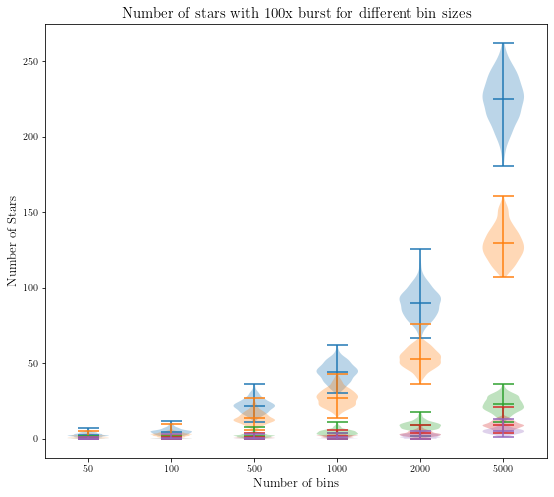

In [190]:
data_5bin_3=[cadence_num_bursts50_5_3,cadence_num_bursts100_5_3,cadence_num_bursts500_5_3,\
              cadence_num_bursts1000_5_3,cadence_num_bursts2000_5_3,cadence_num_bursts5000_5_3]
data_5bin_6=[cadence_num_bursts50_5_6,cadence_num_bursts100_5_6,cadence_num_bursts500_5_6,\
              cadence_num_bursts1000_5_6,cadence_num_bursts2000_5_6,cadence_num_bursts5000_5_6]
data_5bin_16=[cadence_num_bursts50_5_16,cadence_num_bursts100_5_16,cadence_num_bursts500_5_16,\
              cadence_num_bursts1000_5_16,cadence_num_bursts2000_5_16,cadence_num_bursts5000_5_16]
data_5bin_40=[cadence_num_bursts50_5_40,cadence_num_bursts100_5_40,cadence_num_bursts500_5_40,\
              cadence_num_bursts1000_5_40,cadence_num_bursts2000_5_40,cadence_num_bursts5000_5_40]
data_5bin_100=[cadence_num_bursts50_5_100,cadence_num_bursts100_5_100,cadence_num_bursts500_5_100,\
              cadence_num_bursts1000_5_100,cadence_num_bursts2000_5_100,cadence_num_bursts5000_5_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_5bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_5bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## 6 bins

In [191]:
run=50
t=300
cadence=2

#run it 50 times
#start with function
def bursts6(full_time,size,prob2,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob2=prob2
    burst_prob3=prob3
    burst_prob6=prob6
    burst_prob16=prob16
    burst_prob40=prob40
    burst_prob100=prob100
    burst=burst_matrix
    L=L_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob2:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                elif prob<=burst_prob2 and prob>burst_prob3:
                    burst[j,i:5+i]=np.nan
                    L[j,i:5+i]=cluster_mag[j]-0.5
                elif prob<=burst_prob3 and prob>burst_prob6:
                    burst[j,i:7+i]=np.nan
                    L[j,i:7+i]=cluster_mag[j]-1.25
                elif prob<=burst_prob6 and prob>burst_prob16:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-2
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:32+i]=np.nan
                    L[j,i:32+i]=cluster_mag[j]-3
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:80+i]=np.nan
                    L[j,i:80+i]=cluster_mag[j]-4
                elif prob<=burst_prob100:
                    burst[j,i:200+i]=np.nan
                    L[j,i:200+i]=cluster_mag[j]-5
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total2=0
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total2=[]
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-0.5:
                total2+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
                total3+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
                total6+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
                total16+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
                total40+=1
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
                total100+=1
        burst_total2.append(total2)
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num2=[]
    frac_val2=0
    burst_num3=[]
    frac_val3=0
    burst_num6=[]
    frac_val6=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-0.5:
                frac_val2+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
                frac_val3+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
                frac_val6+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
                frac_val16+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
                frac_val40+=1
            elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
                frac_val100+=1
        burst_num2.append(frac_val2)
        frac_val2=0
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num6.append(frac_val6)
        frac_val6=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
    
    return burst_total,burst_total2,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,\
burst_num2,burst_num3,burst_num6,burst_num16,burst_num40,burst_num100

## 50 stars

In [192]:
cluster_size50_6=50
steps=t*cadence
burst50_6=np.ones((cluster_size50_6,steps))
L50_6=np.zeros((cluster_size50_6,steps))
prob50_6_2=my_probability(1.6,5,1.6)
prob50_6_3=my_probability(3.2,5,3.2)
prob50_6_6=my_probability(6.3,5,6.3)
prob50_6_16=my_probability(16,5,16)/cadence
prob50_6_40=my_probability(40,5,40)/cadence
prob50_6_100=my_probability(100,5,100)/cadence

burst_total50_6=[]
burst_total50_6_2=[]
burst_num50_6_2=[]
burst_total50_6_3=[]
burst_num50_6_3=[]
burst_total50_6_6=[]
burst_num50_6_6=[]
burst_total50_6_16=[]
burst_num50_6_16=[]
burst_total50_6_40=[]
burst_num50_6_40=[]
burst_total50_6_100=[]
burst_num50_6_100=[]

for i in range(run):
    burst50_6=np.ones((cluster_size50_6,steps))
    L50_6=np.zeros((cluster_size50_6,steps))
    values50_6=bursts6(t,50,prob50_6_2,prob50_6_3,prob50_6_6,prob50_6_16,prob50_6_40,prob50_6_100,L50_6,burst50_6)
    burst_total50_6.append(values50_6[0])
    burst_total50_6_2.append(values50_6[1])
    burst_total50_6_3.append(values50_6[2])
    burst_total50_6_6.append(values50_6[3])
    burst_total50_6_16.append(values50_6[4])
    burst_total50_6_40.append(values50_6[5])
    burst_total50_6_100.append(values50_6[6])
    burst_num50_6_2.append(values50_6[7])
    burst_num50_6_3.append(values50_6[8])
    burst_num50_6_6.append(values50_6[9])
    burst_num50_6_16.append(values50_6[10])
    burst_num50_6_40.append(values50_6[11])
    burst_num50_6_100.append(values50_6[12])

In [193]:
cadence_num_bursts50_6_2=[]
cadence_num_bursts50_6_3=[]
cadence_num_bursts50_6_6=[]
cadence_num_bursts50_6_16=[]
cadence_num_bursts50_6_40=[]
cadence_num_bursts50_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts50_6_2.append(burst_num50_6_2[i][j])       
        cadence_num_bursts50_6_3.append(burst_num50_6_3[i][j])
        cadence_num_bursts50_6_6.append(burst_num50_6_6[i][j])        
        cadence_num_bursts50_6_16.append(burst_num50_6_16[i][j])
        cadence_num_bursts50_6_40.append(burst_num50_6_40[i][j])
        cadence_num_bursts50_6_100.append(burst_num50_6_100[i][j])

## 100 stars

In [194]:
cluster_size100_6=100
steps=t*cadence
burst100_6=np.ones((cluster_size100_6,steps))
L100_6=np.zeros((cluster_size100_6,steps))
prob100_6_2=my_probability(1.6,5,1.6)
prob100_6_3=my_probability(3.2,5,3.2)
prob100_6_6=my_probability(6.3,5,6.3)
prob100_6_16=my_probability(16,5,16)/cadence
prob100_6_40=my_probability(40,5,40)/cadence
prob100_6_100=my_probability(100,5,100)/cadence

burst_total100_6=[]
burst_total100_6_2=[]
burst_num100_6_2=[]
burst_total100_6_3=[]
burst_num100_6_3=[]
burst_total100_6_6=[]
burst_num100_6_6=[]
burst_total100_6_16=[]
burst_num100_6_16=[]
burst_total100_6_40=[]
burst_num100_6_40=[]
burst_total100_6_100=[]
burst_num100_6_100=[]

for i in range(run):
    burst100_6=np.ones((cluster_size100_6,steps))
    L100_6=np.zeros((cluster_size100_6,steps))
    values100_6=bursts6(t,100,prob100_6_2,prob100_6_3,prob100_6_6,prob100_6_16,prob100_6_40,prob100_6_100,\
                        L100_6,burst100_6)
    burst_total100_6.append(values100_6[0])
    burst_total100_6_2.append(values100_6[1])
    burst_total100_6_3.append(values100_6[2])
    burst_total100_6_6.append(values100_6[3])
    burst_total100_6_16.append(values100_6[4])
    burst_total100_6_40.append(values100_6[5])
    burst_total100_6_100.append(values100_6[6])
    burst_num100_6_2.append(values100_6[7])
    burst_num100_6_3.append(values100_6[8])
    burst_num100_6_6.append(values100_6[9])
    burst_num100_6_16.append(values100_6[10])
    burst_num100_6_40.append(values100_6[11])
    burst_num100_6_100.append(values100_6[12])

In [195]:
cadence_num_bursts100_6_2=[]
cadence_num_bursts100_6_3=[]
cadence_num_bursts100_6_6=[]
cadence_num_bursts100_6_16=[]
cadence_num_bursts100_6_40=[]
cadence_num_bursts100_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts100_6_2.append(burst_num100_6_2[i][j])       
        cadence_num_bursts100_6_3.append(burst_num100_6_3[i][j])
        cadence_num_bursts100_6_6.append(burst_num100_6_6[i][j])        
        cadence_num_bursts100_6_16.append(burst_num100_6_16[i][j])
        cadence_num_bursts100_6_40.append(burst_num100_6_40[i][j])
        cadence_num_bursts100_6_100.append(burst_num100_6_100[i][j])

## 500 stars

In [196]:
cluster_size500_6=500
steps=t*cadence
burst500_6=np.ones((cluster_size500_6,steps))
L500_6=np.zeros((cluster_size500_6,steps))
prob500_6_2=my_probability(1.6,5,1.6)
prob500_6_3=my_probability(3.2,5,3.2)
prob500_6_6=my_probability(6.3,5,6.3)
prob500_6_16=my_probability(16,5,16)/cadence
prob500_6_40=my_probability(40,5,40)/cadence
prob500_6_100=my_probability(100,5,100)/cadence

burst_total500_6=[]
burst_total500_6_2=[]
burst_num500_6_2=[]
burst_total500_6_3=[]
burst_num500_6_3=[]
burst_total500_6_6=[]
burst_num500_6_6=[]
burst_total500_6_16=[]
burst_num500_6_16=[]
burst_total500_6_40=[]
burst_num500_6_40=[]
burst_total500_6_100=[]
burst_num500_6_100=[]

for i in range(run):
    burst500_6=np.ones((cluster_size500_6,steps))
    L500_6=np.zeros((cluster_size500_6,steps))
    values500_6=bursts6(t,500,prob500_6_2,prob500_6_3,prob500_6_6,prob500_6_16,prob500_6_40,prob500_6_100,\
                        L500_6,burst500_6)
    burst_total500_6.append(values500_6[0])
    burst_total500_6_2.append(values500_6[1])
    burst_total500_6_3.append(values500_6[2])
    burst_total500_6_6.append(values500_6[3])
    burst_total500_6_16.append(values500_6[4])
    burst_total500_6_40.append(values500_6[5])
    burst_total500_6_100.append(values500_6[6])
    burst_num500_6_2.append(values500_6[7])
    burst_num500_6_3.append(values500_6[8])
    burst_num500_6_6.append(values500_6[9])
    burst_num500_6_16.append(values500_6[10])
    burst_num500_6_40.append(values500_6[11])
    burst_num500_6_100.append(values500_6[12])

In [197]:
cadence_num_bursts500_6_2=[]
cadence_num_bursts500_6_3=[]
cadence_num_bursts500_6_6=[]
cadence_num_bursts500_6_16=[]
cadence_num_bursts500_6_40=[]
cadence_num_bursts500_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts500_6_2.append(burst_num500_6_2[i][j])       
        cadence_num_bursts500_6_3.append(burst_num500_6_3[i][j])
        cadence_num_bursts500_6_6.append(burst_num500_6_6[i][j])        
        cadence_num_bursts500_6_16.append(burst_num500_6_16[i][j])
        cadence_num_bursts500_6_40.append(burst_num500_6_40[i][j])
        cadence_num_bursts500_6_100.append(burst_num500_6_100[i][j])

## 1000 stars

In [198]:
cluster_size1000_6=1000
steps=t*cadence
burst1000_6=np.ones((cluster_size1000_6,steps))
L1000_6=np.zeros((cluster_size1000_6,steps))
prob1000_6_2=my_probability(1.6,5,1.6)
prob1000_6_3=my_probability(3.2,5,3.2)
prob1000_6_6=my_probability(6.3,5,6.3)
prob1000_6_16=my_probability(16,5,16)/cadence
prob1000_6_40=my_probability(40,5,40)/cadence
prob1000_6_100=my_probability(100,5,100)/cadence

burst_total1000_6=[]
burst_total1000_6_2=[]
burst_num1000_6_2=[]
burst_total1000_6_3=[]
burst_num1000_6_3=[]
burst_total1000_6_6=[]
burst_num1000_6_6=[]
burst_total1000_6_16=[]
burst_num1000_6_16=[]
burst_total1000_6_40=[]
burst_num1000_6_40=[]
burst_total1000_6_100=[]
burst_num1000_6_100=[]

for i in range(run):
    burst1000_6=np.ones((cluster_size1000_6,steps))
    L1000_6=np.zeros((cluster_size1000_6,steps))
    values1000_6=bursts6(t,1000,prob1000_6_2,prob1000_6_3,prob1000_6_6,prob1000_6_16,prob1000_6_40,prob1000_6_100,\
                        L1000_6,burst1000_6)
    burst_total1000_6.append(values1000_6[0])
    burst_total1000_6_2.append(values1000_6[1])
    burst_total1000_6_3.append(values1000_6[2])
    burst_total1000_6_6.append(values1000_6[3])
    burst_total1000_6_16.append(values1000_6[4])
    burst_total1000_6_40.append(values1000_6[5])
    burst_total1000_6_100.append(values1000_6[6])
    burst_num1000_6_2.append(values1000_6[7])
    burst_num1000_6_3.append(values1000_6[8])
    burst_num1000_6_6.append(values1000_6[9])
    burst_num1000_6_16.append(values1000_6[10])
    burst_num1000_6_40.append(values1000_6[11])
    burst_num1000_6_100.append(values1000_6[12])

In [199]:
cadence_num_bursts1000_6_2=[]
cadence_num_bursts1000_6_3=[]
cadence_num_bursts1000_6_6=[]
cadence_num_bursts1000_6_16=[]
cadence_num_bursts1000_6_40=[]
cadence_num_bursts1000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts1000_6_2.append(burst_num1000_6_2[i][j])       
        cadence_num_bursts1000_6_3.append(burst_num1000_6_3[i][j])
        cadence_num_bursts1000_6_6.append(burst_num1000_6_6[i][j])        
        cadence_num_bursts1000_6_16.append(burst_num1000_6_16[i][j])
        cadence_num_bursts1000_6_40.append(burst_num1000_6_40[i][j])
        cadence_num_bursts1000_6_100.append(burst_num1000_6_100[i][j])

## 2000 stars

In [200]:
cluster_size2000_6=2000
steps=t*cadence
burst2000_6=np.ones((cluster_size2000_6,steps))
L2000_6=np.zeros((cluster_size2000_6,steps))
prob2000_6_2=my_probability(1.6,5,1.6)
prob2000_6_3=my_probability(3.2,5,3.2)
prob2000_6_6=my_probability(6.3,5,6.3)
prob2000_6_16=my_probability(16,5,16)/cadence
prob2000_6_40=my_probability(40,5,40)/cadence
prob2000_6_100=my_probability(100,5,100)/cadence

burst_total2000_6=[]
burst_total2000_6_2=[]
burst_num2000_6_2=[]
burst_total2000_6_3=[]
burst_num2000_6_3=[]
burst_total2000_6_6=[]
burst_num2000_6_6=[]
burst_total2000_6_16=[]
burst_num2000_6_16=[]
burst_total2000_6_40=[]
burst_num2000_6_40=[]
burst_total2000_6_100=[]
burst_num2000_6_100=[]

for i in range(run):
    burst2000_6=np.ones((cluster_size2000_6,steps))
    L2000_6=np.zeros((cluster_size2000_6,steps))
    values2000_6=bursts6(t,2000,prob2000_6_2,prob2000_6_3,prob2000_6_6,prob2000_6_16,prob2000_6_40,prob2000_6_100,\
                        L2000_6,burst2000_6)
    burst_total2000_6.append(values2000_6[0])
    burst_total2000_6_2.append(values2000_6[1])
    burst_total2000_6_3.append(values2000_6[2])
    burst_total2000_6_6.append(values2000_6[3])
    burst_total2000_6_16.append(values2000_6[4])
    burst_total2000_6_40.append(values2000_6[5])
    burst_total2000_6_100.append(values2000_6[6])
    burst_num2000_6_2.append(values2000_6[7])
    burst_num2000_6_3.append(values2000_6[8])
    burst_num2000_6_6.append(values2000_6[9])
    burst_num2000_6_16.append(values2000_6[10])
    burst_num2000_6_40.append(values2000_6[11])
    burst_num2000_6_100.append(values2000_6[12])

In [201]:
cadence_num_bursts2000_6_2=[]
cadence_num_bursts2000_6_3=[]
cadence_num_bursts2000_6_6=[]
cadence_num_bursts2000_6_16=[]
cadence_num_bursts2000_6_40=[]
cadence_num_bursts2000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts2000_6_2.append(burst_num2000_6_2[i][j])       
        cadence_num_bursts2000_6_3.append(burst_num2000_6_3[i][j])
        cadence_num_bursts2000_6_6.append(burst_num2000_6_6[i][j])        
        cadence_num_bursts2000_6_16.append(burst_num2000_6_16[i][j])
        cadence_num_bursts2000_6_40.append(burst_num2000_6_40[i][j])
        cadence_num_bursts2000_6_100.append(burst_num2000_6_100[i][j])

## 5000 stars

In [202]:
cluster_size5000_6=5000
steps=t*cadence
burst5000_6=np.ones((cluster_size5000_6,steps))
L5000_6=np.zeros((cluster_size5000_6,steps))
prob5000_6_2=my_probability(1.6,5,1.6)
prob5000_6_3=my_probability(3.2,5,3.2)
prob5000_6_6=my_probability(6.3,5,6.3)
prob5000_6_16=my_probability(16,5,16)/cadence
prob5000_6_40=my_probability(40,5,40)/cadence
prob5000_6_100=my_probability(100,5,100)/cadence

burst_total5000_6=[]
burst_total5000_6_2=[]
burst_num5000_6_2=[]
burst_total5000_6_3=[]
burst_num5000_6_3=[]
burst_total5000_6_6=[]
burst_num5000_6_6=[]
burst_total5000_6_16=[]
burst_num5000_6_16=[]
burst_total5000_6_40=[]
burst_num5000_6_40=[]
burst_total5000_6_100=[]
burst_num5000_6_100=[]

for i in range(run):
    print(i)
    burst5000_6=np.ones((cluster_size5000_6,steps))
    L5000_6=np.zeros((cluster_size5000_6,steps))
    values5000_6=bursts6(t,5000,prob5000_6_2,prob5000_6_3,prob5000_6_6,prob5000_6_16,prob5000_6_40,prob5000_6_100,\
                        L5000_6,burst5000_6)
    burst_total5000_6.append(values5000_6[0])
    burst_total5000_6_2.append(values5000_6[1])
    burst_total5000_6_3.append(values5000_6[2])
    burst_total5000_6_6.append(values5000_6[3])
    burst_total5000_6_16.append(values5000_6[4])
    burst_total5000_6_40.append(values5000_6[5])
    burst_total5000_6_100.append(values5000_6[6])
    burst_num5000_6_2.append(values5000_6[7])
    burst_num5000_6_3.append(values5000_6[8])
    burst_num5000_6_6.append(values5000_6[9])
    burst_num5000_6_16.append(values5000_6[10])
    burst_num5000_6_40.append(values5000_6[11])
    burst_num5000_6_100.append(values5000_6[12])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [203]:
cadence_num_bursts5000_6_2=[]
cadence_num_bursts5000_6_3=[]
cadence_num_bursts5000_6_6=[]
cadence_num_bursts5000_6_16=[]
cadence_num_bursts5000_6_40=[]
cadence_num_bursts5000_6_100=[]
for i in range(0,run-1):
    for j in t_list_cadence:
        cadence_num_bursts5000_6_2.append(burst_num5000_6_2[i][j])       
        cadence_num_bursts5000_6_3.append(burst_num5000_6_3[i][j])
        cadence_num_bursts5000_6_6.append(burst_num5000_6_6[i][j])        
        cadence_num_bursts5000_6_16.append(burst_num5000_6_16[i][j])
        cadence_num_bursts5000_6_40.append(burst_num5000_6_40[i][j])
        cadence_num_bursts5000_6_100.append(burst_num5000_6_100[i][j])

[]

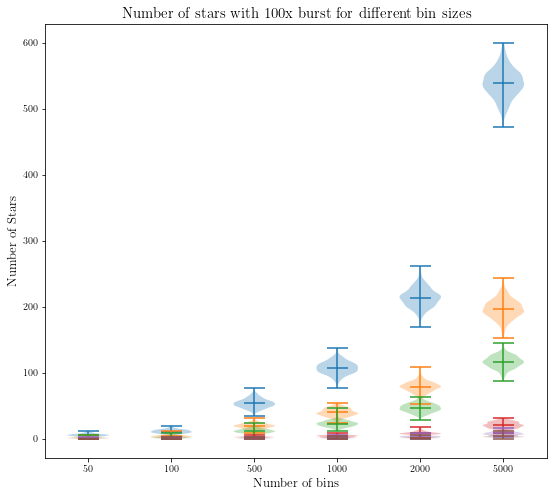

In [204]:
data_6bin_2=[cadence_num_bursts50_6_2,cadence_num_bursts100_6_2,cadence_num_bursts500_6_2,\
            cadence_num_bursts1000_6_2,cadence_num_bursts2000_6_2,cadence_num_bursts5000_6_2]
data_6bin_3=[cadence_num_bursts50_6_3,cadence_num_bursts100_6_3,cadence_num_bursts500_6_3,\
              cadence_num_bursts1000_6_3,cadence_num_bursts2000_6_3,cadence_num_bursts5000_6_3]
data_6bin_6=[cadence_num_bursts50_6_6,cadence_num_bursts100_6_6,cadence_num_bursts500_6_6,\
              cadence_num_bursts1000_6_6,cadence_num_bursts2000_6_6,cadence_num_bursts5000_6_6]
data_6bin_16=[cadence_num_bursts50_6_16,cadence_num_bursts100_6_16,cadence_num_bursts500_6_16,\
              cadence_num_bursts1000_6_16,cadence_num_bursts2000_6_16,cadence_num_bursts5000_6_16]
data_6bin_40=[cadence_num_bursts50_6_40,cadence_num_bursts100_6_40,cadence_num_bursts500_6_40,\
              cadence_num_bursts1000_6_40,cadence_num_bursts2000_6_40,cadence_num_bursts5000_6_40]
data_6bin_100=[cadence_num_bursts50_6_100,cadence_num_bursts100_6_100,cadence_num_bursts500_6_100,\
              cadence_num_bursts1000_6_100,cadence_num_bursts2000_6_100,cadence_num_bursts5000_6_100]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
#plt.yscale('log')
ax.violinplot(data_6bin_2,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.violinplot(data_6bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
#ax.axhline(0.01,color='red',lw=1)
ax.set_xlabel('Number of bins',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of stars with 100x burst for different bin sizes',font='serif',fontsize=15)
plt.plot()

## panel plot

## add in ghost points

In [282]:
mean_num50_1=np.mean(cadence_num_bursts50_1)

mean_num50_2_100=np.mean(cadence_num_bursts50_2_100)
mean_num50_2_40=np.mean(cadence_num_bursts50_2_40)

mean_num50_3_100=np.mean(cadence_num_bursts50_3_100)
mean_num50_3_40=np.mean(cadence_num_bursts50_3_40)
mean_num50_3_16=np.mean(cadence_num_bursts50_3_16)

mean_num50_4_100=np.mean(cadence_num_bursts50_4_100)
mean_num50_4_40=np.mean(cadence_num_bursts50_4_40)
mean_num50_4_16=np.mean(cadence_num_bursts50_4_16)
mean_num50_4_6=np.mean(cadence_num_bursts50_4_6)

mean_num50_5_100=np.mean(cadence_num_bursts50_5_100)
mean_num50_5_40=np.mean(cadence_num_bursts50_5_40)
mean_num50_5_16=np.mean(cadence_num_bursts50_5_16)
mean_num50_5_6=np.mean(cadence_num_bursts50_5_6)
mean_num50_5_3=np.mean(cadence_num_bursts50_5_3)

mean_num50_6_100=np.mean(cadence_num_bursts50_6_100)
mean_num50_6_40=np.mean(cadence_num_bursts50_6_40)
mean_num50_6_16=np.mean(cadence_num_bursts50_6_16)
mean_num50_6_6=np.mean(cadence_num_bursts50_6_6)
mean_num50_6_3=np.mean(cadence_num_bursts50_6_3)
mean_num50_6_2=np.mean(cadence_num_bursts50_6_2)

In [283]:
mean_num100_1=np.mean(cadence_num_bursts100_1)
mean_num500_1=np.mean(cadence_num_bursts500_1)
mean_num1000_1=np.mean(cadence_num_bursts1000_1)
mean_num2000_1=np.mean(cadence_num_bursts2000_1)
mean_num5000_1=np.mean(cadence_num_bursts5000_1)

<ipython-input-284-7d8685edee70>:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
<ipython-input-284-7d8685edee70>:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])


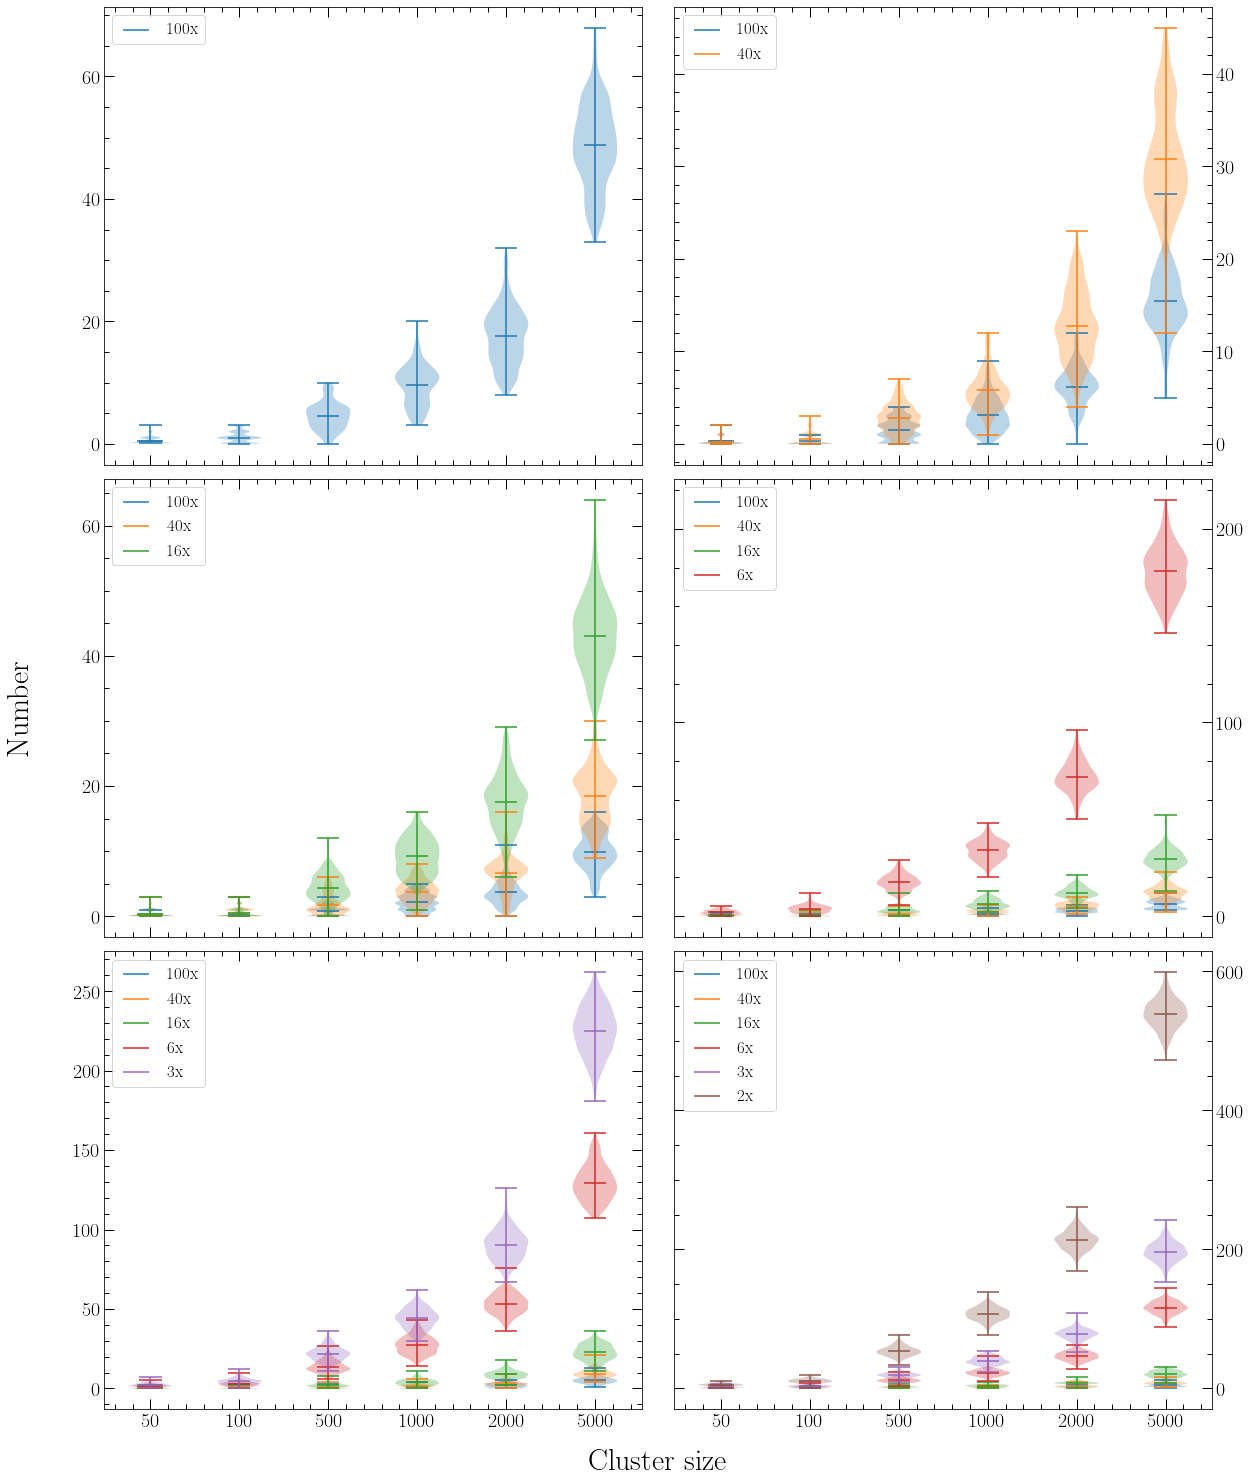

In [284]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,sharex='col')
fig.set_size_inches(16,20)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#ax1
ax1.violinplot(data_1bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax2
ax2.violinplot(data_2bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_2bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)


#ax3
ax3.violinplot(data_3bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax3.violinplot(data_3bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax4
ax4.violinplot(data_4bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_4bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax5
ax5.violinplot(data_5bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax5.violinplot(data_5bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax6.violinplot(data_6bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_40,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_16,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_6,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_3,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax6.violinplot(data_6bin_2,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

fig.tight_layout()

#tick mark time
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax3.minorticks_on()
ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax3.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax4.minorticks_on()
ax4.locator_params(axis='y',nbins=4)
ax4.yaxis.tick_right()
ax4.yaxis.set_ticks_position('both')
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax4.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax5.minorticks_on()
ax5.locator_params(axis='y',nbins=6)
ax5.tick_params(axis='both',right=True,top=True,which='both')
ax5.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax5.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax6.minorticks_on()
ax6.locator_params(axis='y',nbins=6)
ax6.yaxis.tick_right()
ax6.yaxis.set_ticks_position('both')
ax6.tick_params(axis='both',right=True,top=True,which='both')
ax6.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax6.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)

#labels
ax1.scatter(1,mean_num50_1,marker='_',s=700,color='#1f77b4',label='100x')

ax2.scatter(1,mean_num50_2_100,marker='_',s=700,color='#1f77b4',label='100x')
ax2.scatter(1,mean_num50_2_40,marker='_',s=700,color='#ff7f0e',label='40x')

ax3.scatter(1,mean_num50_3_100,marker='_',s=700,color='#1f77b4',label='100x')
ax3.scatter(1,mean_num50_3_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax3.scatter(1,mean_num50_3_16,marker='_',s=700,color='#2ca02c',label='16x')

ax4.scatter(1,mean_num50_4_100,marker='_',s=700,color='#1f77b4',label='100x')
ax4.scatter(1,mean_num50_4_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax4.scatter(1,mean_num50_4_16,marker='_',s=700,color='#2ca02c',label='16x')
ax4.scatter(1,mean_num50_4_6,marker='_',s=700,color='#d62728',label='6x')

ax5.scatter(1,mean_num50_5_100,marker='_',s=700,color='#1f77b4',label='100x')
ax5.scatter(1,mean_num50_5_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax5.scatter(1,mean_num50_5_16,marker='_',s=700,color='#2ca02c',label='16x')
ax5.scatter(1,mean_num50_5_6,marker='_',s=700,color='#d62728',label='6x')
ax5.scatter(1,mean_num50_5_3,marker='_',s=700,color='#9467bd',label='3x')

ax6.scatter(1,mean_num50_6_100,marker='_',s=700,color='#1f77b4',label='100x')
ax6.scatter(1,mean_num50_6_40,marker='_',s=700,color='#ff7f0e',label='40x')
ax6.scatter(1,mean_num50_6_16,marker='_',s=700,color='#2ca02c',label='16x')
ax6.scatter(1,mean_num50_6_6,marker='_',s=700,color='#d62728',label='6x')
ax6.scatter(1,mean_num50_6_3,marker='_',s=700,color='#9467bd',label='3x')
ax6.scatter(1,mean_num50_6_2,marker='_',s=700,color='#8c564b',label='2x')



ax7=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax7.set_ylabel(r'Number',fontsize=30,labelpad=70)
ax7.set_xlabel('Cluster size',fontsize=30,labelpad=40)

ax1.legend(fontsize=17,loc='upper left')
ax2.legend(fontsize=17,loc='upper left')
ax3.legend(fontsize=17,loc='upper left')
ax4.legend(fontsize=17,loc='upper left')
ax5.legend(fontsize=17,loc='upper left')
ax6.legend(fontsize=17,loc='upper left')

#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax5.set_yscale('log')
#ax6.set_yscale('log')
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/multipanel/Comp_Bin_Size_BurstNum_All.jpeg',dpi=300,bbox_inches='tight')

In [285]:
data50=[cadence_num_bursts50_1,cadence_num_bursts50_2_100,cadence_num_bursts50_3_100,\
            cadence_num_bursts50_4_100,cadence_num_bursts50_5_100,cadence_num_bursts50_6_100]
data100=[cadence_num_bursts100_1,cadence_num_bursts100_2_100,cadence_num_bursts100_3_100,\
            cadence_num_bursts100_4_100,cadence_num_bursts100_5_100,cadence_num_bursts100_6_100]
data500=[cadence_num_bursts500_1,cadence_num_bursts500_2_100,cadence_num_bursts500_3_100,\
            cadence_num_bursts500_4_100,cadence_num_bursts500_5_100,cadence_num_bursts500_6_100]
data1000=[cadence_num_bursts1000_1,cadence_num_bursts1000_2_100,cadence_num_bursts1000_3_100,\
            cadence_num_bursts1000_4_100,cadence_num_bursts1000_5_100,cadence_num_bursts1000_6_100]
data2000=[cadence_num_bursts2000_1,cadence_num_bursts2000_2_100,cadence_num_bursts2000_3_100,\
            cadence_num_bursts2000_4_100,cadence_num_bursts2000_5_100,cadence_num_bursts2000_6_100]
data5000=[cadence_num_bursts5000_1,cadence_num_bursts5000_2_100,cadence_num_bursts5000_3_100,\
            cadence_num_bursts5000_4_100,cadence_num_bursts5000_5_100,cadence_num_bursts5000_6_100]

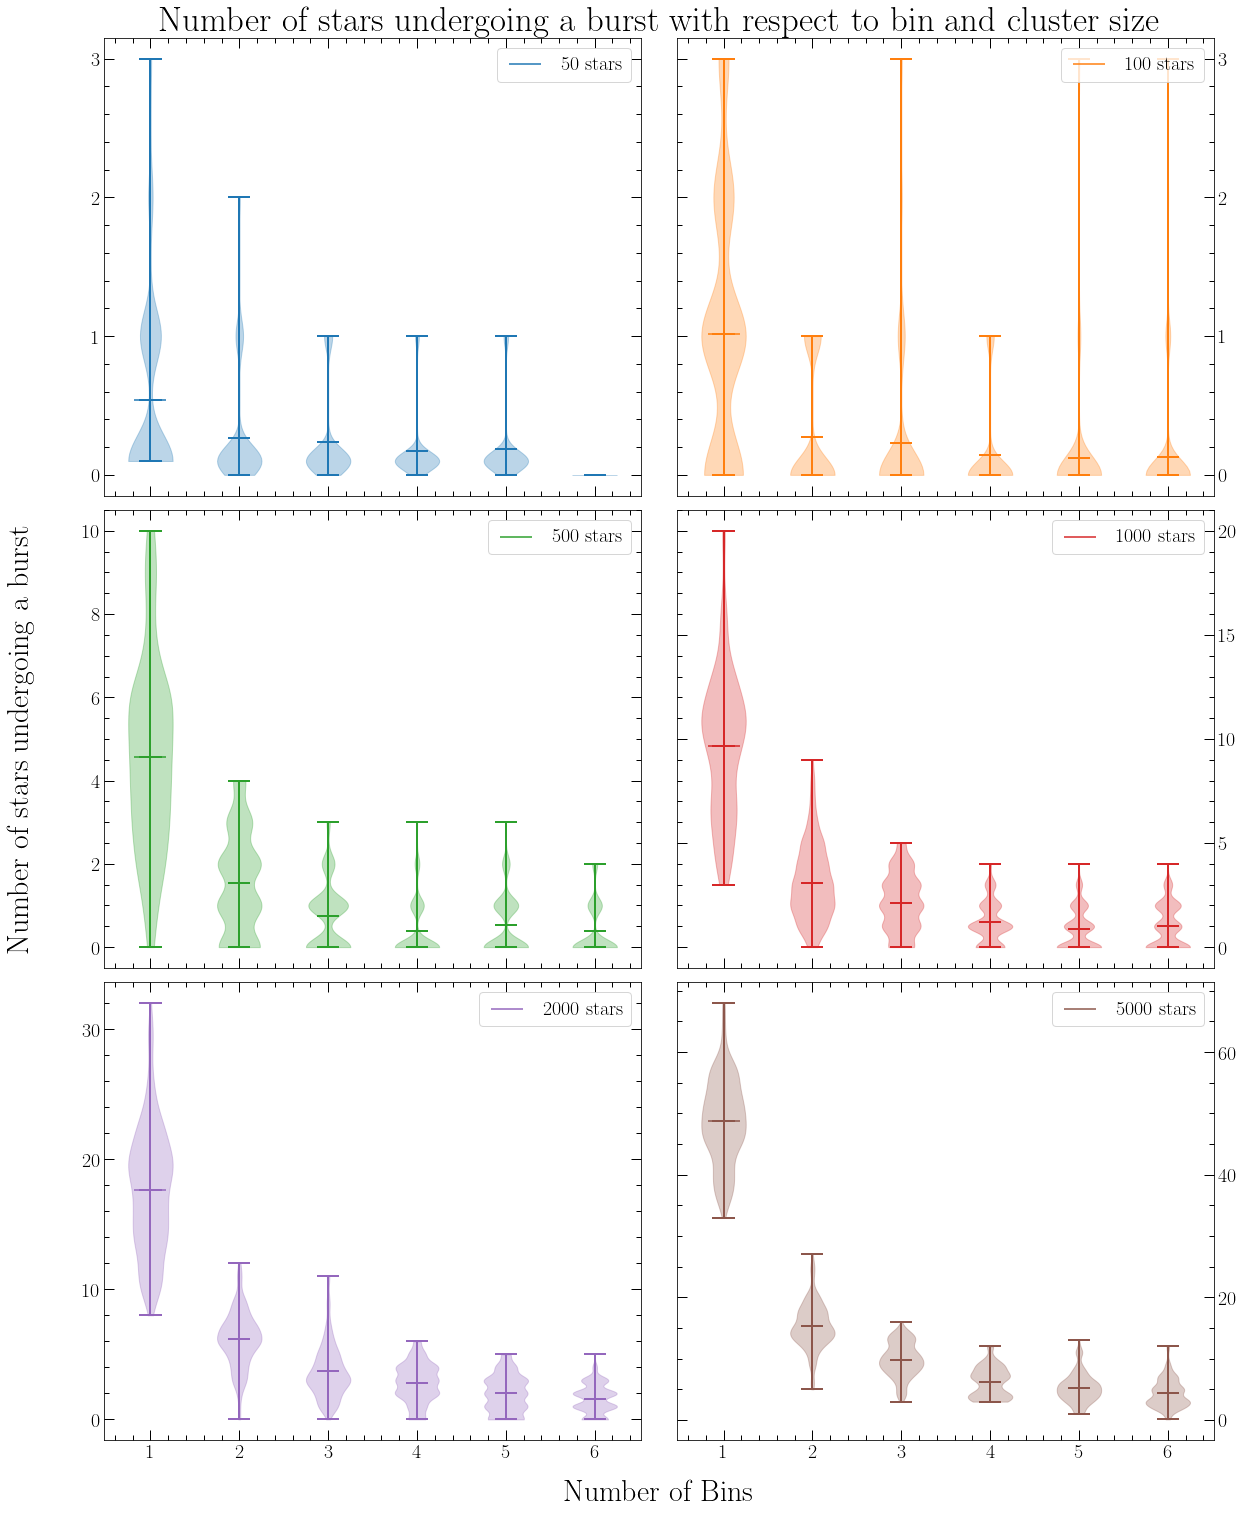

In [286]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,sharex='col')
fig.set_size_inches(16,20)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#colors
#blue=#1f77b4
#orange=#ff7f0e
#green=#2ca02c
#red=#d62728
#purple=#9467bd
#brown=#8c564b

#ax1
v1=ax1.violinplot(data50,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v1['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

#ax2
v2=ax2.violinplot(data100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v2['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v2[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

#ax3
v3=ax3.violinplot(data500,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v3['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

#ax4
v4=ax4.violinplot(data1000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v4['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v4[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

#ax5
v5=ax5.violinplot(data2000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v5['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v5[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)

#ax6
v6=ax6.violinplot(data5000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v6['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2)

fig.tight_layout()

#tick mark time
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax3.minorticks_on()
ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax3.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax4.minorticks_on()
ax4.locator_params(axis='y',nbins=6)
ax4.yaxis.tick_right()
ax4.yaxis.set_ticks_position('both')
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax4.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax5.minorticks_on()
ax5.locator_params(axis='y',nbins=6)
ax5.tick_params(axis='both',right=True,top=True,which='both')
ax5.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax5.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)
ax6.minorticks_on()
ax6.locator_params(axis='y',nbins=6)
ax6.yaxis.tick_right()
ax6.yaxis.set_ticks_position('both')
ax6.tick_params(axis='both',right=True,top=True,which='both')
ax6.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=20)
ax6.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=20)

#labels
ax1.scatter(1,mean_num50_1,marker='_',s=1000,color='#1f77b4',label='50 stars')

ax2.scatter(1,mean_num100_1,marker='_',s=1000,color='#ff7f0e',label='100 stars')

ax3.scatter(1,mean_num500_1,marker='_',s=1000,color='#2ca02c',label='500 stars')

ax4.scatter(1,mean_num1000_1,marker='_',s=1000,color='#d62728',label='1000 stars')

ax5.scatter(1,mean_num2000_1,marker='_',s=1000,color='#9467bd',label='2000 stars')

ax6.scatter(1,mean_num5000_1,marker='_',s=1000,color='#8c564b',label='5000 stars')


ax7=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax7.set_yticks([])
ax7.set_xticks([])
#ax5.set_xticklabels(['0','50','100','500','1000','2000','5000'])
#ax6.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax7.set_ylabel(r'Number of stars undergoing a burst',fontsize=30,labelpad=70)
ax7.set_xlabel('Number of Bins',fontsize=30,labelpad=40)
ax7.set_title('Number of stars undergoing a burst with respect to bin and cluster size',fontsize=35)

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)
ax5.legend(fontsize=20)
ax6.legend(fontsize=20)

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/multipanel/Comp_bin_num_all.jpeg',dpi=300,bbox_inches='tight')

<ipython-input-298-22956661d92d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


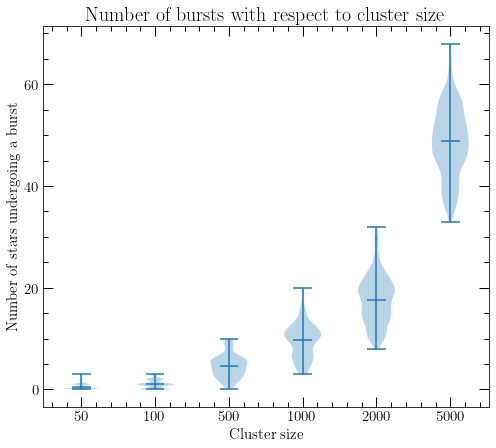

In [298]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#ax1
ax1.violinplot(data_1bin_100,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Cluster size',fontsize=15)
ax1.set_title('Number of bursts with respect to cluster size',fontsize=20)

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/SizeChange/num_all_100x.jpeg',dpi=300,bbox_inches='tight')

## 2000 stars, 6 bins

<ipython-input-306-3f9c46e255b1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','2','3','6','16','40','100'])


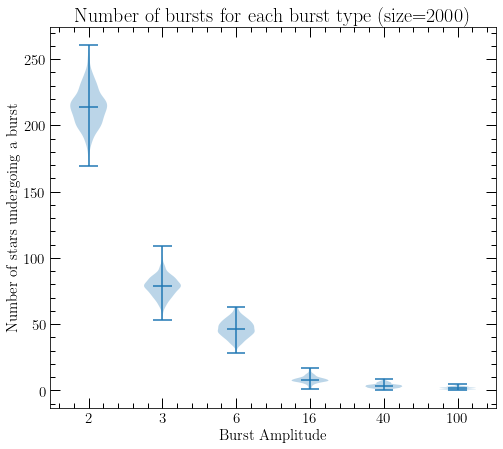

In [306]:
data_6bin_2000=[cadence_num_bursts2000_6_2,cadence_num_bursts2000_6_3,cadence_num_bursts2000_6_6,\
            cadence_num_bursts2000_6_16,cadence_num_bursts2000_6_40,cadence_num_bursts2000_6_100]


fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='True'
plt.rcParams['font.family']='Times'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['font.weight']='bold'

#ax1
ax1.violinplot(data_6bin_2000,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','2','3','6','16','40','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=20)

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp_2000_6bins.jpeg',dpi=300,bbox_inches='tight')